Y-DATA 2020/21<br/>
Deep Learning HW7<br/>
Serge Tochilov

##1.
Explain each of these terms in a sentence or two:

- Cross-entropy
- Gradient clipping
- Residual connections
- Momentum
- Cyclic learning rate
- Dropout
- The Inception module
- Stride
- Bottleneck layer
- 1x1 convolution
- DenseNet

> **Cross-entropy**. This loss criterion is often used in classification tasks with multi-class categorical targets. Can be expressed as applying log-softmax function and negative log-likelihood criterion consecutively to logit output of the last layer.

> **Gradient clipping**. Sometimes during backpropagation the gradient values can become very large and overwhelm the employed floating point range (RNNs are especially affected as they retain the gradients along their input-hidden-input circular path, which may amplify initial rise). Gradient clipping sets the maximum allowed gradient value to which any larger values are clipped.

> **Residual connections**. Forward connections between layers of a NN that skip several non-linear layers. Inspired by the brain structure and employed in the successful ResNet (Residual Network) NN architecture.

> **Momentum**. A method for parameter updating when parameter vector is considered a point in parameter space moving with some momentum. The gradient influences the momentum change, not the displacement, and then the displacement is computed from the momentum multiplying it by learning rate.

> **Cyclic learning rate**. Usually the learning rate is decreasing by a constant factor after completion of another predefined number of training epochs, since the network is converging toward a minimum and more precision is required. However, resetting the learning rate to its initial value after the assumed convergence sometimes yields better result as the model explores more parameter space and could find a lower local minimum.

> **Dropout**. The method of regularization and overfitting prevention for a NN model when during one forward-backward cycle some neurons of a layer neither contribute inputs to the next layer, nor take part in the gradient updating.

> **The Inception module**. In the CNN context this module consists of several parallel layers (since the term "inception", i.e. layering) with the same input. The output of these layers is concatenated into one output vector so the next layer gets a chance to learn from whatever inception layer is better catch input features.

> **Stride**. Displacement in input pixels between two neighbouring applications of a convolutional kernel. Must be positive and may be different across H, W dimensions.

> **Bottleneck layer**. A convolutional hidden layer in the CNN architecture which has maximal compression w.r.t. network input, usually followed by classifying fully-connected layers. This compression is a type of regularization that prevents overfitting, and optimal configuration of the bottleneck layer is an area of active theoretical research.

> **1x1 convolution**. Used as dimensionality reduction for a number of input channels that disregards dependencies between neighbouring input pixels. Conserves H, W dimensions.

> **DenseNet**. A type of CNN where each layer is connected not only to the next forward layer, but to every upstream layer. The architecture encourages the model to reuse features from downstream layers, reduces the number of parameters, and is resilient to vanishing gradients through rich cross-connections.

##2.

Explain the pros and cons of using small and large batch sizes.

> From the computational efficiency point of view, using large batch size is preferred as it takes fewer steps to complete a training epoch and lowers input-output overhead. The maximum batch size is usually limited by available CPU or GPU memory. However, using smaller batch size has other advantages. Imagine that we compute a step using all the available dataset, i.e. use the maximal batch size possible. Then each training epoch would be the same and the model explores just one possible path when optimizing in the parameter space. On the opposite end of the batch size spectrum lies the Stochastic Gradient Descent method which uses only one sample per batch, effectively randomizing the parameter optimization that speeds up convergence and helps to avoid "stucking" in a local minima. Therefore, batch size choice is a trade-off between computational efficiency on one hand, and good accuracy and fast convergence on the other.

##3.

How many $3\times3$ filters are needed to replace a $7\times7$ kernel? Compare the number of parameters in each option.

> Let's assume that "$7\times7$ kernel" means "convolutional filter with $7\times7$ kernel". Also let the number of input channel be $I$ and the number of output channels be $O$. Then the number of different filters equals $O$ in both cases, and the number of parameters:

Filter&nbsp;&nbsp;&nbsp;&nbsp;|Number of parameters&nbsp;&nbsp;&nbsp;&nbsp;
 --- | ---
$7\times7$|$(I\times7\times7 + 1)\times O$
$3\times3$|$(I\times3\times3 + 1)\times O$

##4.

Why are RNNs more prone to diminishing gradients?

> Sometimes during backpropagation the computed gradient values can become very small and the parameter updating effectively stops. RNNs are especially affected as they retain the gradients along their input-hidden-input circular path, which may amplify initial diminishing.

##5.

Suggest a few methods for augmenting textual data.

> Augmenting of textual data is conceptually similar to augmenting of image data $-$ by randomly varying the same input text over and over and feeding the result to the model less overfitting and better accuracy can be achieved. Text augmenting may be performed on character, word and sentence levels. Methods which are similar to employed on images are deletion, insertion, swapping/shuffling. One word-level method which is unique to text data is synonym replacement, when randomly selected non-stop words are replaced by their synonyms. A variation of that technique is translating a text to some other language then back.

##6.

Describe a few methods to explain what CNNs learn.

> **Weight matrix visualizing**. Learned weights of CNN's filters can be visualized as color 2D-images. The weights in layers close to the input often exhibit distinct spatial patterns optimized to recognize different features like edges, blobs, etc.

> **Semantic grouping**. Level of abstraction in CNN seemingly increases from input to output, i.e. deeper layers learn to recognize more complex features. If we have a large dataset with images representing different concepts we may group images that cause high level of activation for the same filter. Often such arrangements demonstrate high level of semantic correlation for adjacent images.

##7.

Explain how, if at all, the curse of dimensionality lives in harmony with the desire for more expressive power to NN and larger hidden representations.

> The curse of dimensionality limits size of fully connected NNs as the number of parameters scales quadratically with the number of neurons. CNNs limit number of parameters and avoid the curse by:
- **Receptive field restriction**. Convolutional filters observe only a small patch of the layer input. Rich feature detection is achieved by having several different filters at the same level, and the position invariance by applying filters across the whole input.
- **Input compression**. Deeper layers receive more and more downscaled input. Downscaling is achieved by combination of filter striding and pooling, usually maxpooling. Also is has an advantage that filters observe increasingly large areas w.r.t. input image.

> As a result, number of parameters of a CNN mainly depends on its architecture. Other NN architectures employ similar ideas to use large number of parameters efficiently.

##8.

Look at the figure below for a suggestion on a NN architecture for processing sequences. The network provides a prediction for each time unit (e.g, predicts the sentiment of each word in the sequence). Explain the pros and cons of this architecture.

> The suggested architecture is a NN with $3$ partly-connected hidden layers and one fully-connected classifier. The architecture has the following advantages:
- Conceptually very simple and easy to develop and run
- Can work on input consisting of disconnected sequences

> And disadvantages:

> - The fully connected layer is very small, just $1$ neuron, which limits the model's ability to learn
- Feature detection is not position invariant, i.e. the same combination of adjacent input values at different positions are learned separately, rendering the architecture very inefficient

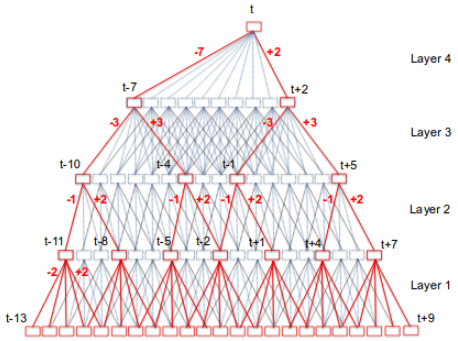

##9.

You are training a neural network for classifying images on a custom dataset, and it doesn't seem to learn anything. Describe your approach to solving the issue.

> It's necessary to do the following:

> - Make sure input images are correctly registered, especially that they're normalized to the required range (usually $[0,1]$)
- Check labels by manually inspecting $10-100$ labelled images
- Try different loss function, learning rate, batch size and optimization strategy
- Make sure image compression and FC-classifier size are appropriate $-$ check whether the layers learn something by inspecting their weights, especially at the last convolutional layer
- Try more epochs, consider using a subset of the input if the inference is too slow for all the input

##10.

Mention the problems imbalanced datasets can cause to Deep Learning problems, and suggest a few ways to avoid them.

> The most obvious problem is measuring performance. One can easily be misled by high accuracy due to class imbalance, so using more sophisticated metrics such as $f1$-score is a must. Another problem is that the overall learning rate (not just the hyperparameter) is proportional to average loss signal, and since for underrepresented classes this signal is weaker the NN learns preferably from the majority class. To mitigate the problem and equalize the class representation one may employ majority class undersampling, if the dataset is large, or minority class oversampling. The oversampling may use repeated, augmented or synthetic data if available.

##11.

You are asked to classify images. Mention a few scenarios in which you'll probably prefer NOT to fine-tune a network pretrained on ImageNet.

> ImageNet contains RGB-color low-res images of "everyday" objects. Therefore, any dataset that differs from these characteristics won't probably benefit from an ImageNet-pretrained model, namely
- Infrared, UV or hyperspectral images
- High-resolution images with small important details like street surveillance
- Scientific images (microphotography, astrophysics images)


##12.

You have a model that detects spam in English emails with good precision and recall. You are asked to build a similar spam detector for emails written in German, but you don't have any labels for emails in German. You do have access to a large corpus of emails in German and English (no translation - different emails).

> The most straightforward method to apply the spam detection model trained on English emails for German ones is just translating subjects and body texts. However, it is impractical for high-throughput spam scanners. Therefore, we would try to utilize the existing English detector for training a model that can handle both languages.

> There are two points to take into account:

> - Non-language-specific parts of an email such as headers, links, HTML formatting contain a lot of information relevant to spam detection
- English and German email texts must share considerable amount of vocabulary, e.g. abbreviations, names, trademarks, international words.

> Then we would proceed as follows:
- Run the English detector on the English corpus and store the classification labels
- From the corpora compile English and German vocabularies using tokenized subjects and body texts only
- Find common words by computing intersection of the vocabularies
- In subjects and body texts of the English corpus replace common words by tokens and the rest of the words by placeholders 
- Train the English detector from scratch using the commonized English corpus and the stored labels

> Having the trained commonized detector model, classification of a German email is simple:
- In the subject and body text replace common words by tokens and the rest by placeholders
- Classify by the commonized detector

> Definitely the commonized detector won't be as good in spam classification as the specialized English one, but anyway we might expect a reasonable performance.

## 13.
You are asked to build a model that sets diacritization symbols (סימני ניקוד) in Hebrew texts. Explain your approach $-$ the data you will try to get, the network architecture, how you would evaluate the model, pitfalls you expect along the way, and any important note you'd like to add.

> Answer:

At first glance, vocalization (diacritization) of Hebrew texts looks easy. There are several online dictionaries such as https://www.pealim.com/, https://www.morfix.co.il/, https://slovar.co.il/translate.php that provide vocalization for their vocabulary (including morphemes), so one simply refers the text's tokens by the dictionary and locate their vocalization. However, Hebrew is a morphologically rich language, which means that syntax of a sentence significantly influence morphology and without syntactic information it's impossible to unambiguously extract morphemes from tokens. Consider the following token:

לפני

Depending of syntactic context it may represent several different morphemes:

לִפְנֵי - *lifn**e**y*, preposition, "in front of, before"

לְפָנַי - *lefan**a**y*, with extra letters לפניי, preposition, with 1st person singular pronominal suffix, "in front of me, before me"

לְפְּנֵי - *lepn**e**y*, -לְ, preposition, "to, for, of" + פְּנֵי, noun, feminine, exclusively plural, construct form, "face, surface" + object

לְפָּנַי - *lepan**a**y*, -לְ, preposition, "to, for, of" + פָּנַי, with extra letters פניי, noun, feminine, exclusively plural, with 1st person singular pronominal suffix, "my face"

לְפְּנֵי - *lepn**e**y*, -לְ, preposition, "to, for, of" + פְּנֵי, noun, masculine, plural, construct form, "sides, aspects" + object

לְפָּנִי - *lepan**i**,* -לְ, preposition, "to, for, of" + פָּנִי, noun, masculine, singular, with 1st person singular pronominal suffix, "my side, aspect"

לְפָּנַי - *lepan**a**y*, -לְ, preposition, "to, for, of" + פָּנַי, with extra letters פניי, noun, masculine, plural, with 1st person singular pronominal suffix, "my sides, aspects"

We see the token can be any of the $7$ (di-)morphemes with $5$ unique vocalizations. This example clearly demonstrates that to correctly extract morphemes one needs a Hebrew syntactic analyzer.

A number of such analyzers have been developed and quick experimenting showed that a morpho-syntactic parser recently developed at the BGU linguistics laboratory (https://nlp.biu.ac.il/~rtsarfaty/onlp/hebrew/), which is trained on the Haaretz newspaper lexicon, is appropriate for syntactic analysis of everyday texts.

Based on the above considerations, we suggest the following algorithm for Hebrew text vocalization.

- Tokenize the text sentence by sentence
- For each sentence perform a morpho-syntactic analysis
- Having a list of morphemes with assigned signatures find their vocalizations in a dictionary

Let's apply this algorithm on a real text, performing it by hand. We use the body's first sentence from the Times of Israel article (https://www.zman.co.il/216699/, visited 30.04.2021):

---
ישראל טעתה טעות קשה באופן הטיפול שלה בבחירות הפלסטיניות ונקלעה למשבר מיותר

---

Before going further we note that the analyzer treats one-letter morphemes separately, but in written Hebrew they are always attached to a next token and their vocalization is often modified, sometimes also changing the adjacent letter's one. We implement the most common case when a preposition with *shva* (:) vowel followed by a definitive -הַ absorbs the latter, acquiring its *patah* (_) vowel. Other modification rules are not considered by the algorithm.

Morpho-syntactic analysis and dictionary referring using signatures to resolve ambiguity when needed gives the following results:

|Morpheme|Signature (if necessary)|Vocalization
| --- | --- | --- |
|ישראל||יִשְׂרָאֵל|
|טעתה||טָעֲתָה
|טעות||טָעוּת|
|קשה|*adjective, feminine, singular*|קָשָׁה
|ב_אופן|*preposition + noun, construct, masculine, singular* (1)|בְאֹופֶן, בְאוֹפַןּ
|ה_טיפול||הַטִיפּוּל
|של_ה|*possessive + pronominal suffix, 3rd person, feminine, singular*|שֶׁלָּהּ
|ב_בחירות|*preposition + absorbed definitive + noun, feminine, plural*|בַּבְּחִירוֹת
|ה_פלסטיניות|*definitive + adjective, feminine, plural* (2)|הַפָלַסְטִינִיות 
|ו_נקלעה||וְנִקְלְעָה
|ל_משבר|*preposition + noun, masculine, singular* (1)|לְמִשְׁבָּר ,לְמַשְׁבֵּר
|מיותר|*adjective, masculine, singular*|מְיוּתָּר

The results are encouraging, however:
1. The signatures couldn't distinguish between אֹופֶן (method, fashion, way) and אוֹפַןּ (wheel), also between מַשְׁבֵּר (crisis, turning point) and מִשְׁבָּר (large wave)
1. The dictionary entry for פלסטיניות doesn't contain vocalization for feminine plural suffix ות-, but it's always וֹת- in Hebrew

To resolve the first two ambiguities, we inspect the syntactic tree and see the tokens in question are paired as follows:

אופן הטיפול

משבר מיותר

Online translation of these token pairs (https://translate.google.com/, https://context.reverso.net/) unequivocally prefer אֹופֶן (method, fashion, way) and מַשְׁבֵּר (crisis, turning point). Thus, the final vocalization result is

---
יִשְׂרָאֵל טָעֲתָה טָעוּת קָשָׁה בְ<b><font color="red">אֹו</font></b>פֶן
הַטִיפּוּל שֶׁלָּהּ בַּבְּחִירוֹת הַפָלַסְ<b><font color="red">טִי</font></b>נִיוֹת וְנִקְלְעָה לְמִשְׁבָּר מְיוּתָּר

---
As a bonus along with vocalizations we get correct stresses, which are marked red if they don't fall on an ultimate syllable. Now a reader has all the information to correctly pronounce the text.

To speed up disambiguation by translation the algorithm may be pretrained on a large corpus of unvocalized Hebrew texts (e.g. https://yeda.cs.technion.ac.il/resources_corpora.html) storing disambiguation results for token pairs.

Nouns that don't have a dictionary entry would probably fall to one of the following categories:

- names, streets, companies (https://github.com/NLPH/NLPH_Resources/tree/master/linguistic_resources/word_lists/dday)
- geolocations (http://data.geo-kima.org/)
- abbreviations, identified by *gershaym* ('', doubled single quote), usually in a penultimate position (https://en.wikipedia.org/wiki/List_of_Hebrew_abbreviations).

Entries in these sources are almost never vocalized and to pronounce them a reader must resort to her lingvo-intuition by choosing an appropriate *mishkal* pattern, however applying this method to automatic vocalization lies out of scope of the presented answer.

Compiling the vocalized text for validation isn't straightforward because in modern Hebrew vocalization is generally omitted and used mainly in entry-level learning texts. Religious texts are often vocalized, but they use archaic Hebrew more or less. One appropriate source of vocalized modern everyday Hebrew is http://hebrewtoday.com, although it distributes materials through subscription.